In [12]:
import pandas as pd 
import numpy as np
from numpy import loadtxt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [13]:
#load data
dataset = pd.read_csv("C:\\Users\\namil\\Downloads\\activemin3.csv").dropna().to_numpy()
X = dataset[:,2:7]
Y = dataset[:,10]
print(X)

[[268.0 24.0 22.0 10.5 0.0]
 [1180.0 81.0 88.0 54.5 18.0]
 [592.0 81.0 30.0 19.0 3.0]
 [448.0 66.0 22.0 10.5 0.0]
 [830.0 92.0 17.0 42.0 10.0]
 [750.0 66.0 28.0 43.0 8.0]
 [608.0 66.0 66.0 10.5 0.0]
 [435.0 16.0 66.0 14.0 4.0]
 [729.17 87.16 19.177 35.217 12.751]
 [712.0 66.0 22.0 42.0 0.0]
 [555.0 94.0 12.0 13.0 5.0]
 [395.0 16.0 16.0 32.0 9.0]
 [902.0 73.0 66.0 42.0 7.0]
 [355.0 19.0 32.0 15.0 5.0]
 [285.0 35.7 39.4 11.6 5.3]
 [268.0 24.0 22.0 10.5 0.0]
 [1110.0 93.0 84.0 44.0 4.0]
 [242.0 42.0 6.8 5.2 0.0]
 [533.194 31.7 38.8194 26.3796 2.7]
 [448.0 66.0 22.0 10.5 0.0]
 [575.0 76.0 22.0 18.5 11.0]
 [490.0 1.9 30.0 9.0 0.0]
 [608.0 66.0 66.0 10.5 0.0]
 [585.0 40.0 76.0 17.0 13.0]
 [1164.0 134.2 29.6 66.2 8.0]
 [712.0 66.0 22.0 42.0 0.0]
 [445.0 43.0 20.0 20.0 13.0]
 [486.0 57.8 24.8 17.0 1.7]
 [268.0 24.0 22.0 10.5 0.0]
 [725.0 94.0 44.0 20.0 4.0]
 [548.5 43.4 30.2 27.6 1.8]
 [902.0 73.0 22.0 42.0 7.0]]


In [14]:
#split into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

MAPE: 0.04859835462243245
RMSE: 573.0165775241122
RMSRE: 0.058103868530876936


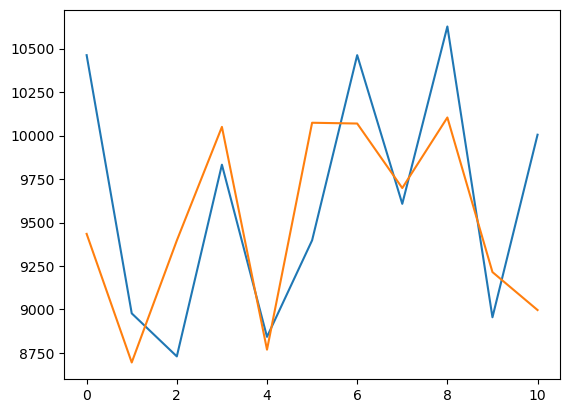

In [15]:
#package error calculations
mape = MAPE(y_test, prediction)
print("MAPE:", mape)
mse = MSE(y_test, prediction)
rmse = mse**0.5
print("RMSE:", rmse)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

MAPE: 0.06278392337232788
RMSE: 934.6106478091103
RMSRE: 0.09557939688292146


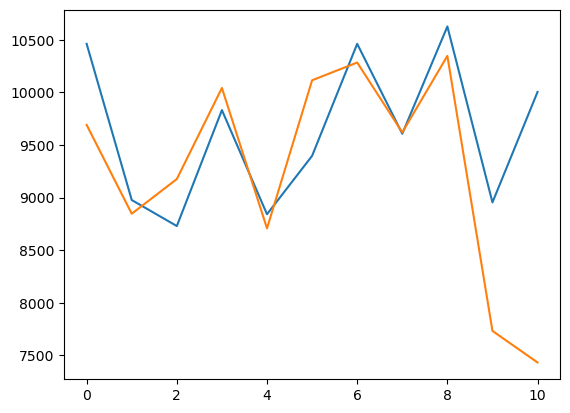

In [17]:
#with activity
X = dataset[:,2:8]
Y = dataset[:,10]

seed = 7
test_size = 0.33
model = XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

#errors
mape = MAPE(y_test, prediction)
print("MAPE:", mape)
mse = MSE(y_test, prediction)
rmse = mse**0.5
print("RMSE:", rmse)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
error = (np.average(arr))**.5
print("RMSRE:", error)

plt.plot(y_test)
plt.plot(prediction)